## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 18ms/step - loss: 1.3961 - accuracy: 0.5055 - val_loss: 1.4494 - val_accuracy: 0.4796
Epoch 2/500
196/196 [==============================] - 3s 17ms/step - loss: 1.3584 - accuracy: 0.5200 - val_loss: 1.4841 - val_accuracy: 0.4724
Epoch 3/500
196/196 [==============================] - 3s 18ms/step - loss: 1.3303 - accuracy: 0.5273 - val_loss: 1.4431 - val_accuracy: 0.4856
Epoch 4/500
196/196 [==============================] - 4s 19ms/step - loss: 1.3009 - accuracy: 0.5398 - val_loss: 1.4086 - val_accuracy: 0.4976
Epoch 5/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2737 - accuracy: 0.5469 - val_loss: 1.3843 - val_accuracy: 0.5135
Epoch 6/500
196/196 [==============================] - 4s 20ms/step - loss: 1.2495 - accuracy: 0.5578 - val_loss: 1.5244 - val_accuracy: 0.4711
Epoch 7/500
196/196 [==============================] - 4s 23ms/step - loss: 1.2180 - accuracy: 0.5707 - val_loss: 1.4310 - val_accuracy:

196/196 [==============================] - 4s 23ms/step - loss: 0.2732 - accuracy: 0.9031 - val_loss: 2.4307 - val_accuracy: 0.5316
Epoch 58/500
196/196 [==============================] - 4s 22ms/step - loss: 0.2638 - accuracy: 0.9082 - val_loss: 2.3339 - val_accuracy: 0.5368
Epoch 59/500
196/196 [==============================] - 5s 24ms/step - loss: 0.2526 - accuracy: 0.9114 - val_loss: 2.5372 - val_accuracy: 0.5201
Epoch 60/500
196/196 [==============================] - 4s 22ms/step - loss: 0.2536 - accuracy: 0.9117 - val_loss: 2.5162 - val_accuracy: 0.5370
Epoch 61/500
196/196 [==============================] - 5s 24ms/step - loss: 0.2447 - accuracy: 0.9133 - val_loss: 2.6345 - val_accuracy: 0.5192
Epoch 62/500
196/196 [==============================] - 5s 24ms/step - loss: 0.2381 - accuracy: 0.9168 - val_loss: 2.6355 - val_accuracy: 0.5204
Epoch 63/500
196/196 [==============================] - 4s 23ms/step - loss: 0.2300 - accuracy: 0.9178 - val_loss: 2.5965 - val_accuracy: 0.529

196/196 [==============================] - 5s 25ms/step - loss: 0.1065 - accuracy: 0.9627 - val_loss: 3.9558 - val_accuracy: 0.5377
Epoch 114/500
196/196 [==============================] - 5s 23ms/step - loss: 0.0979 - accuracy: 0.9658 - val_loss: 3.9969 - val_accuracy: 0.5311
Epoch 115/500
196/196 [==============================] - 5s 24ms/step - loss: 0.0722 - accuracy: 0.9752 - val_loss: 3.8811 - val_accuracy: 0.5390
Epoch 116/500
196/196 [==============================] - 5s 23ms/step - loss: 0.0782 - accuracy: 0.9724 - val_loss: 3.9775 - val_accuracy: 0.5300
Epoch 117/500
196/196 [==============================] - 5s 23ms/step - loss: 0.0728 - accuracy: 0.9750 - val_loss: 4.0581 - val_accuracy: 0.5337
Epoch 118/500
196/196 [==============================] - 5s 24ms/step - loss: 0.0709 - accuracy: 0.9747 - val_loss: 4.0573 - val_accuracy: 0.5389
Epoch 119/500
196/196 [==============================] - 5s 24ms/step - loss: 0.0698 - accuracy: 0.9760 - val_loss: 4.1898 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 5.0769e-04 - accuracy: 1.0000 - val_loss: 4.8405 - val_accuracy: 0.5514
Epoch 170/500
196/196 [==============================] - 4s 20ms/step - loss: 5.4179e-04 - accuracy: 1.0000 - val_loss: 4.8552 - val_accuracy: 0.5526
Epoch 171/500
196/196 [==============================] - 4s 20ms/step - loss: 4.6709e-04 - accuracy: 1.0000 - val_loss: 4.8626 - val_accuracy: 0.5524
Epoch 172/500
196/196 [==============================] - 4s 20ms/step - loss: 4.4246e-04 - accuracy: 1.0000 - val_loss: 4.8588 - val_accuracy: 0.5512
Epoch 173/500
196/196 [==============================] - 4s 20ms/step - loss: 4.1744e-04 - accuracy: 1.0000 - val_loss: 4.8774 - val_accuracy: 0.5506
Epoch 174/500
196/196 [==============================] - 4s 20ms/step - loss: 4.1935e-04 - accuracy: 1.0000 - val_loss: 4.8909 - val_accuracy: 0.5532
Epoch 175/500
196/196 [==============================] - 4s 20ms/step - loss: 3.8915e-04 - accuracy: 1.0000 - val_

Epoch 224/500
196/196 [==============================] - 4s 20ms/step - loss: 1.7876e-04 - accuracy: 1.0000 - val_loss: 5.1125 - val_accuracy: 0.5541
Epoch 225/500
196/196 [==============================] - 4s 20ms/step - loss: 1.7664e-04 - accuracy: 1.0000 - val_loss: 5.1128 - val_accuracy: 0.5545
Epoch 226/500
196/196 [==============================] - 4s 20ms/step - loss: 1.7555e-04 - accuracy: 1.0000 - val_loss: 5.1129 - val_accuracy: 0.5541
Epoch 227/500
196/196 [==============================] - 4s 21ms/step - loss: 1.7316e-04 - accuracy: 1.0000 - val_loss: 5.1198 - val_accuracy: 0.5540
Epoch 228/500
196/196 [==============================] - 4s 20ms/step - loss: 1.7184e-04 - accuracy: 1.0000 - val_loss: 5.1173 - val_accuracy: 0.5540
Epoch 229/500
196/196 [==============================] - 4s 20ms/step - loss: 1.7067e-04 - accuracy: 1.0000 - val_loss: 5.1258 - val_accuracy: 0.5537
Epoch 230/500
196/196 [==============================] - 4s 19ms/step - loss: 1.6889e-04 - accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.2176e-04 - accuracy: 1.0000 - val_loss: 5.2295 - val_accuracy: 0.5531
Epoch 279/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2107e-04 - accuracy: 1.0000 - val_loss: 5.2322 - val_accuracy: 0.5539
Epoch 280/500
196/196 [==============================] - 4s 20ms/step - loss: 1.2061e-04 - accuracy: 1.0000 - val_loss: 5.2288 - val_accuracy: 0.5535
Epoch 281/500
196/196 [==============================] - 4s 20ms/step - loss: 1.1984e-04 - accuracy: 1.0000 - val_loss: 5.2341 - val_accuracy: 0.5534
Epoch 282/500
196/196 [==============================] - 4s 19ms/step - loss: 1.1870e-04 - accuracy: 1.0000 - val_loss: 5.2368 - val_accuracy: 0.5531
Epoch 283/500
196/196 [==============================] - 4s 20ms/step - loss: 1.1880e-04 - accuracy: 1.0000 - val_loss: 5.2391 - val_accuracy: 0.5536
Epoch 284/500
196/196 [==============================] - 4s 19ms/step - loss: 1.1755e-04 - accuracy: 1.0000 - val_

Epoch 333/500
196/196 [==============================] - 4s 19ms/step - loss: 9.4110e-05 - accuracy: 1.0000 - val_loss: 5.3120 - val_accuracy: 0.5541
Epoch 334/500
196/196 [==============================] - 4s 19ms/step - loss: 9.3919e-05 - accuracy: 1.0000 - val_loss: 5.3132 - val_accuracy: 0.5536
Epoch 335/500
196/196 [==============================] - 4s 19ms/step - loss: 9.3364e-05 - accuracy: 1.0000 - val_loss: 5.3145 - val_accuracy: 0.5539
Epoch 336/500
196/196 [==============================] - 4s 19ms/step - loss: 9.3015e-05 - accuracy: 1.0000 - val_loss: 5.3155 - val_accuracy: 0.5531
Epoch 337/500
196/196 [==============================] - 4s 19ms/step - loss: 9.2633e-05 - accuracy: 1.0000 - val_loss: 5.3176 - val_accuracy: 0.5534
Epoch 338/500
196/196 [==============================] - 4s 19ms/step - loss: 9.2395e-05 - accuracy: 1.0000 - val_loss: 5.3197 - val_accuracy: 0.5528
Epoch 339/500
196/196 [==============================] - 4s 19ms/step - loss: 9.1856e-05 - accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 7.8012e-05 - accuracy: 1.0000 - val_loss: 5.3780 - val_accuracy: 0.5536
Epoch 388/500
196/196 [==============================] - 4s 19ms/step - loss: 7.7608e-05 - accuracy: 1.0000 - val_loss: 5.3779 - val_accuracy: 0.5541
Epoch 389/500
196/196 [==============================] - 4s 19ms/step - loss: 7.7288e-05 - accuracy: 1.0000 - val_loss: 5.3778 - val_accuracy: 0.5542
Epoch 390/500
196/196 [==============================] - 4s 19ms/step - loss: 7.6991e-05 - accuracy: 1.0000 - val_loss: 5.3800 - val_accuracy: 0.5541
Epoch 391/500
196/196 [==============================] - 4s 19ms/step - loss: 7.6657e-05 - accuracy: 1.0000 - val_loss: 5.3815 - val_accuracy: 0.5542
Epoch 392/500
196/196 [==============================] - 4s 19ms/step - loss: 7.6682e-05 - accuracy: 1.0000 - val_loss: 5.3813 - val_accuracy: 0.5537
Epoch 393/500
196/196 [==============================] - 4s 19ms/step - loss: 7.6295e-05 - accuracy: 1.0000 - val_

Epoch 442/500
196/196 [==============================] - 4s 19ms/step - loss: 6.6348e-05 - accuracy: 1.0000 - val_loss: 5.4322 - val_accuracy: 0.5542
Epoch 443/500
196/196 [==============================] - 4s 19ms/step - loss: 6.6129e-05 - accuracy: 1.0000 - val_loss: 5.4324 - val_accuracy: 0.5548
Epoch 444/500
196/196 [==============================] - 4s 19ms/step - loss: 6.5985e-05 - accuracy: 1.0000 - val_loss: 5.4347 - val_accuracy: 0.5548
Epoch 445/500
196/196 [==============================] - 4s 18ms/step - loss: 6.5763e-05 - accuracy: 1.0000 - val_loss: 5.4346 - val_accuracy: 0.5544
Epoch 446/500
196/196 [==============================] - 4s 19ms/step - loss: 6.5553e-05 - accuracy: 1.0000 - val_loss: 5.4354 - val_accuracy: 0.5543
Epoch 447/500
196/196 [==============================] - 4s 19ms/step - loss: 6.5460e-05 - accuracy: 1.0000 - val_loss: 5.4362 - val_accuracy: 0.5537
Epoch 448/500
196/196 [==============================] - 4s 19ms/step - loss: 6.5301e-05 - accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 5.8117e-05 - accuracy: 1.0000 - val_loss: 5.4792 - val_accuracy: 0.5549
Epoch 497/500
196/196 [==============================] - 4s 19ms/step - loss: 5.8018e-05 - accuracy: 1.0000 - val_loss: 5.4799 - val_accuracy: 0.5544
Epoch 498/500
196/196 [==============================] - 4s 18ms/step - loss: 5.7940e-05 - accuracy: 1.0000 - val_loss: 5.4799 - val_accuracy: 0.5545
Epoch 499/500
196/196 [==============================] - 4s 19ms/step - loss: 5.7855e-05 - accuracy: 1.0000 - val_loss: 5.4796 - val_accuracy: 0.5543
Epoch 500/500
196/196 [==============================] - 4s 19ms/step - loss: 5.7690e-05 - accuracy: 1.0000 - val_loss: 5.4818 - val_accuracy: 0.5545


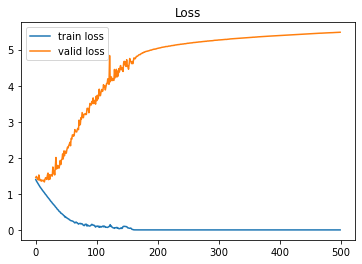

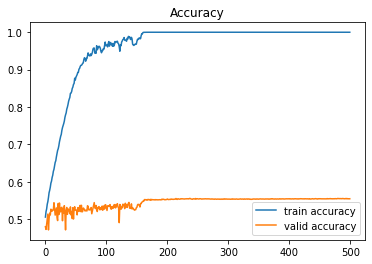

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()